# Classification with Linear Regression

Write only the imports you use for this exercise. 

In [67]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from sklearn.datasets import load_wine

# Required for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

The wine dataset in scikit-learn is a classic dataset commonly used in machine learning for classification tasks. This dataset is included in the sklearn.datasets module and can be easily loaded for experimentation and educational purposes. 

You can (and should) read about the dataset here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

Here's a breakdown of its key characteristics:

- **Origin**: The dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (types of grape). The analysis determined the quantities of 13 constituents found in each of the three types of wines.
- **Features**: The dataset contains 13 different measurements taken from the analysis of the wines, which serve as the features. These measurements include aspects such as:
    - Alcohol content.
    - Malic acid.
    - Ash.
    - Alcalinity of ash.
    - Magnesium content.
    - Total phenols.
    - Flavanoids.
    - Nonflavanoid phenols.
    - Proanthocyanins.
    - Color intensity.
    - Hue.
    - OD280/OD315 of diluted wines.
    - Proline (a type of amino acid).
- **Target Variable**: The target variable in this dataset is the type of wine, which is a categorical variable indicating one of the three possible cultivars.
- **Dataset Size**: The dataset is not very large, making it manageable for training models without requiring significant computational resources. It includes *178 samples*, which is sufficient for learning but small enough for quick experimentation.

For this exercise, we will only focus on two features: **Alcohol content** and **OD280/OD315 of diluted wines** (which is the protein content). We will attempt to build a linear classification model 

In [27]:
wine = load_wine()

feature_1 = wine.feature_names[0]
feature_2 = wine.feature_names[11]
print(f"The features are '{feature_1}' and '{feature_2}'")

# Correcting the concatenation to create a 2D array
X = np.column_stack((wine.data[:, 0], wine.data[:, 11]))
Y = wine.target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=5, test_size=0.15)
# ... use 15% for testing; use random_state=5 to match the provided solution

The features are 'alcohol' and 'od280/od315_of_diluted_wines'


Text(0, 0.5, 'od280/od315_of_diluted_wines')

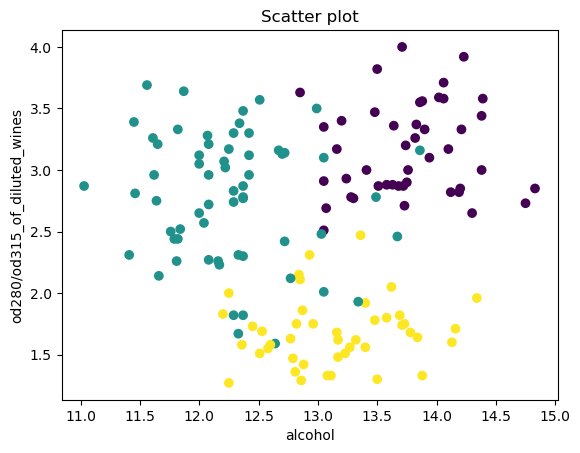

In [42]:
# Plot training set; label the axes based on the feature names
plt.scatter(x=X_train[:,0], y=X_train[:,1], c=y_train)
plt.title("Scatter plot")
plt.xlabel(feature_1)
plt.ylabel(feature_2)

In [111]:
# Create and fit the linear regression model
# ...
model = LinearRegression().fit(X_train, y_train)
# Compute coefficients
coef = model.coef_
intercept = model.intercept_
print("coef: ", coef)
print("intercept: ", intercept)
# Predict on the testing set
y_predict = np.round(model.predict(X_test))

coef:  [-0.24189425 -0.82269386]
intercept:  6.245655955547535


In [112]:
# Calculate accuracy
print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))


0.7037037037037037
[[9 5 0]
 [1 8 0]
 [0 2 2]]


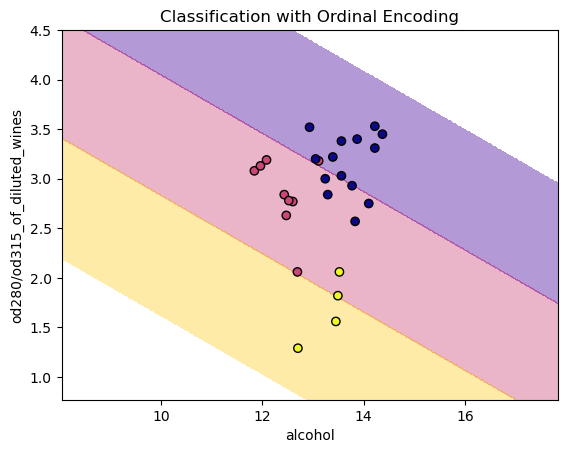

In [115]:
x1_min, x1_max = X[:,1].min() - 3, X[:,1].max() + 3
x2_min, x2_max = X[:,2].min() - 0.5, X[:,2].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))

# Predict on meshgrid
Z = np.round(model.predict(np.c_[xx1.ravel(), xx2.ravel()])) # rounded
Z = Z.reshape(xx1.shape)

# Plot decision boundaries and data points
plt.contourf(xx1, xx2, Z, alpha=0.4, levels=np.arange(-0.5, 2.5, 0.5), cmap='plasma')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, edgecolors='k', cmap='plasma')
plt.title("Classification with Ordinal Encoding")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.show()

[[9 5 0]
 [1 8 0]
 [0 2 2]]


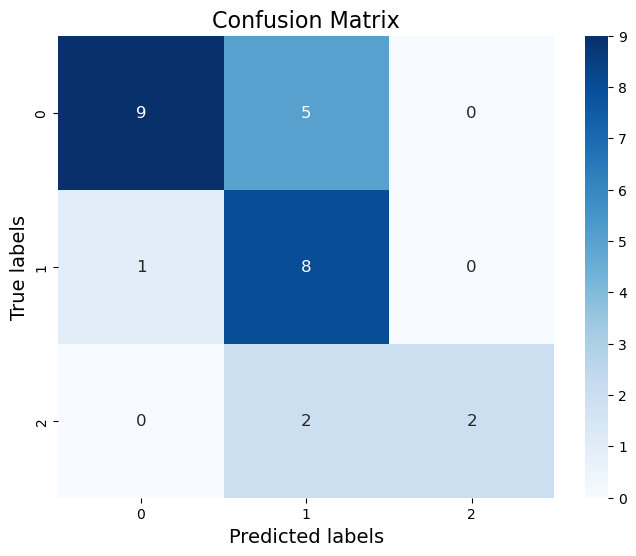

In [77]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"fontsize": 12})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [87]:
# Determine if both features are important for predicting the label
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     199.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           7.02e-46
Time:                        18:20:23   Log-Likelihood:                -100.95
No. Observations:                 178   AIC:                             207.9
Df Residuals:                     175   BIC:                             217.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5129      0.525     12.397      0.000       5.476       7.550
x1            -0.2603      0.040     -6.516      0.000      -0.339      -0.181
x2            -0.8389      0.046    -18.367      0.000      -0.929      -0.749
==============================================================================
Omnibus:                        8.556   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.162
Skew:                          -0.107   Prob(JB):                        0.125
Kurtosis:                       2.282   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observation
We can see that p value for intercept, x1, x2 are less than 0.05 so we have to reject the null hypothesis and we can assume that both of the features are important.

In [90]:
# Calculate Precision and Recall for each averaging method
precision_macro = precision_score(y_test, y_predict, average='macro')
recall_macro = recall_score(y_test, y_predict, average='macro')

precision_weighted = precision_score(y_test, y_predict, average='weighted')
recall_weighted = recall_score(y_test, y_predict, average='weighted')

precision_micro = precision_score(y_test, y_predict, average='micro')
recall_micro = recall_score(y_test, y_predict, average='micro')

print(f'Macro Precision: {precision_macro}')
print(f'Macro Recall: {recall_macro}')
print(f'Weighted Precision: {precision_weighted}')
print(f'Weighted Recall: {recall_weighted}')
print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')

Macro Precision: 0.8111111111111112
Macro Recall: 0.6772486772486772
Weighted Precision: 0.7925925925925925
Weighted Recall: 0.7037037037037037
Micro Precision: 0.7037037037037037
Micro Recall: 0.7037037037037037


## Write Up

Write a summary of the work you performed above. Make sure your summary answers the following questions:

1. What is the model you constructed from the dataset? How would it classify the wine with 13.8% alcohol and 3.3 dilute?
2. What is this model's accuracy?
3. Were both coefficients and intercept informative?
4. Of the three classes, which one had the highest recall? Which one had the highest precision? Your model is called a classifier. Which class does the model classify best?